In [2]:
#Car sales data
The data includes the sales of different passenger cars with different features.
To find out which feature plays important role in prediction of car price.
Train the data and predict the price and check the accuracy of the prediction.

Objective:
    
Maximize: Sales of the car
    
Minimize: Churn rate
    
constraint: Lack of data coverage for all customers and some missing fetures.
        

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('Car_sales.csv')

In [3]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
#To know the features of the dataset
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
#To know the missing values in the dataset

df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
#Filling the missing values with mode function

df['__year_resale_value'] = df['__year_resale_value'].fillna(df['__year_resale_value'].mode()[0])

df['Price_in_thousands'] = df['Price_in_thousands'].fillna(df['Price_in_thousands'].mode()[0])

df['Engine_size'] = df['Engine_size'].fillna(df['Engine_size'].mode()[0])

df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mode()[0])

df['Wheelbase'] = df['Wheelbase'].fillna(df['Wheelbase'].mode()[0])

df['Width'] = df['Width'].fillna(df['Width'].mode()[0])

df['Length'] = df['Length'].fillna(df['Length'].mode()[0])

df['Curb_weight'] = df['Curb_weight'].fillna(df['Curb_weight'].mode()[0])

df['Fuel_capacity'] = df['Fuel_capacity'].fillna(df['Fuel_capacity'].mode()[0])

df['Fuel_efficiency'] = df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].mode()[0])

df['Power_perf_factor'] = df['Power_perf_factor'].fillna(df['Power_perf_factor'].mode()[0])

In [9]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [10]:
#Checking for the duplicate values in the data set

duplicate = df.duplicated()

sum(duplicate)

0

In [11]:
#No duplicate values in the dataset

In [12]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [13]:
#Converting the float data type into int type

df['Sales_in_thousands'] = df['Sales_in_thousands'].astype('int64')
df['__year_resale_value'] = df['__year_resale_value'].astype('int64')
df['Price_in_thousands'] = df['Price_in_thousands'].astype('int64')
df['Engine_size'] = df['Engine_size'].astype('int64')
df['Horsepower'] = df['Horsepower'].astype('int64')
df['Wheelbase'] = df['Wheelbase'].astype('int64')
df['Width'] = df['Width'].astype('int64')
df['Length'] = df['Length'].astype('int64')
df['Curb_weight'] = df['Curb_weight'].astype('int64')
df['Fuel_capacity'] = df['Fuel_capacity'].astype('int64')
df['Fuel_efficiency'] = df['Fuel_efficiency'].astype('int64')
df['Power_perf_factor'] = df['Power_perf_factor'].astype('int64')


In [14]:
df.dtypes

Manufacturer           object
Model                  object
Sales_in_thousands      int64
__year_resale_value     int64
Vehicle_type           object
Price_in_thousands      int64
Engine_size             int64
Horsepower              int64
Wheelbase               int64
Width                   int64
Length                  int64
Curb_weight             int64
Fuel_capacity           int64
Fuel_efficiency         int64
Latest_Launch          object
Power_perf_factor       int64
dtype: object

<AxesSubplot:>

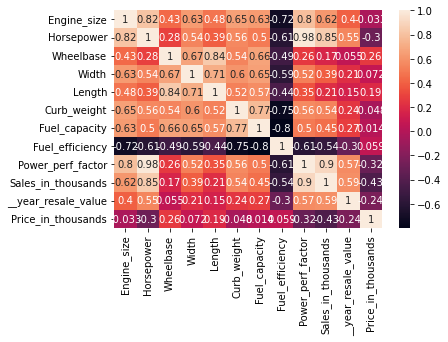

In [106]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#observation
Horse power and Power_perf_factor are highly corelated with each other followed by wheel base and length.
Engine size and Fuel_effeciency have the least corelation with each other.


<AxesSubplot:xlabel='Manufacturer', ylabel='Price_in_thousands'>

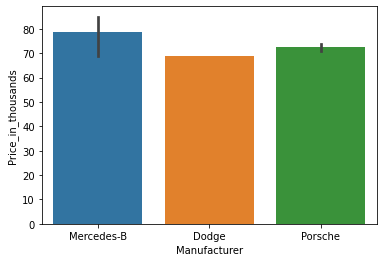

In [15]:
sns.barplot(x='Manufacturer',y='Price_in_thousands', data=df.sort_values('Price_in_thousands').tail(6))

In [16]:
#Visualizaton
Mercedes has been producing costliest car followed by Porsche

SyntaxError: invalid syntax (3073344700.py, line 2)

<AxesSubplot:xlabel='Manufacturer', ylabel='Fuel_efficiency'>

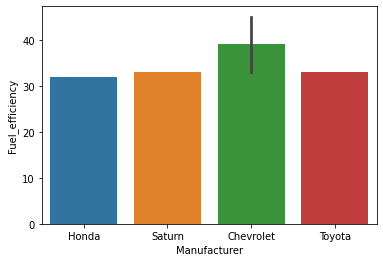

In [19]:
sns.barplot(x='Manufacturer',y='Fuel_efficiency', data=df.sort_values('Fuel_efficiency').tail(6))

In [20]:
#Visualization
Chevrolet has manufactured most fuel effecient cars 
Toyota and Saturn share the 2nd position

SyntaxError: invalid syntax (2283603860.py, line 2)

In [21]:
manufacturer_names = df.Manufacturer.value_counts().index

In [22]:
manufacturer_val = df.Manufacturer.value_counts().values

In [23]:
manufacturer_names

Index(['Dodge', 'Ford', 'Toyota', 'Chevrolet', 'Mercedes-B', 'Mitsubishi',
       'Nissan', 'Chrysler', 'Volvo', 'Oldsmobile', 'Lexus', 'Mercury',
       'Pontiac', 'Volkswagen', 'Saturn', 'Cadillac', 'Honda', 'Plymouth',
       'Acura', 'Buick', 'Audi', 'Jeep', 'Porsche', 'Hyundai', 'BMW',
       'Lincoln', 'Saab', 'Subaru', 'Jaguar', 'Infiniti'],
      dtype='object')

In [24]:
manufacturer_val

array([11, 11,  9,  9,  9,  7,  7,  7,  6,  6,  6,  6,  6,  6,  5,  5,  5,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  2,  2,  1,  1], dtype=int64)

([<matplotlib.patches.Wedge at 0x1cfae6f3d00>,
 [Text(0.4844335995233389, 0.9875849774337707, 'Dodge'),
  Text(-1.0774829574468832, -0.22142826470782498, 'Ford'),
  Text(0.6733164415636503, -0.8698534184102881, 'Toyota')],
 [Text(0.2642365088309121, 0.5386827149638749, '35.48%'),
  Text(-0.5877179767892089, -0.12077905347699543, '35.48%'),
  Text(0.36726351358017284, -0.47446550095106615, '29.03%')])

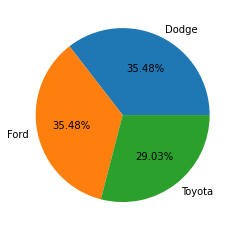

In [25]:
#Pie chart
plt.pie(manufacturer_val[:3],labels=manufacturer_names[:3], autopct='%1.2f%%')

In [26]:
#obseravtion :Maximum number of cars are sold by Ford and Dodge with 35.48%, followed by Toyota with 29.03%.

In [27]:
#Finding out outliers in the dataset

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_in_thousands'>

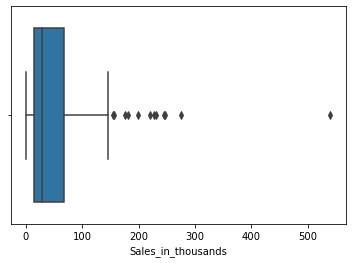

In [28]:
sns.boxplot(df.Sales_in_thousands)

In [29]:
Q1 =df['Sales_in_thousands'].quantile(0.25)
Q3 = df['Sales_in_thousands'].quantile(0.75)

In [30]:
Q1,Q3

(14.0, 67.0)

In [31]:
IQR = Q3-Q1
IQR

53.0

In [32]:
lower_limit =Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-65.5, 146.5)

In [33]:
outlier = np.where(df['Sales_in_thousands']>upper_limit, True,np.where(df['Sales_in_thousands']<lower_limit,True,False))
outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [34]:
df_trimmed = df.loc[~(outlier),]

In [35]:
df_trimmed

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16,16,Passenger,21,1,140,101,67,172,2,13,28,2/2/2012,58
1,Acura,TL,39,19,Passenger,28,3,225,108,70,192,3,17,25,6/3/2011,91
2,Acura,CL,14,18,Passenger,12,3,225,106,70,192,3,17,26,1/4/2012,52
3,Acura,RL,8,29,Passenger,42,3,210,114,71,196,3,18,22,3/10/2011,91
4,Audi,A4,20,22,Passenger,23,1,150,102,68,178,2,16,27,10/8/2011,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3,7,Passenger,24,1,160,100,67,176,3,15,25,9/21/2011,66
153,Volvo,S70,15,7,Passenger,27,2,168,104,69,185,3,17,25,11/24/2012,70
154,Volvo,V70,17,7,Passenger,28,2,168,104,69,186,3,17,25,6/25/2011,71
155,Volvo,C70,3,7,Passenger,45,2,236,104,71,185,3,18,23,4/26/2011,101


In [36]:
#Applying winsorization technique to replace the outliers with upper limit or lower limit values
from feature_engine.outliers import Winsorizer

In [37]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='Sales_in_thousands')
df_t = winsor.fit_transform(df[['Sales_in_thousands']])

In [38]:
df_t

,Sales_in_thousands
0,16.0
1,39.0
2,14.0
3,8.0
4,20.0
...,...
152,3.0
153,15.0
154,17.0
155,3.0


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_in_thousands'>

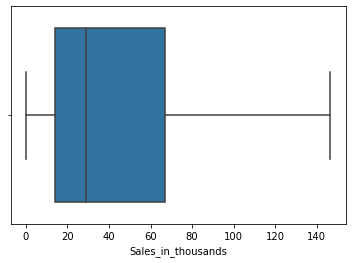

In [39]:
sns.boxplot(df_t.Sales_in_thousands)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='__year_resale_value'>

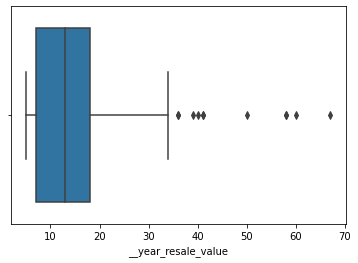

In [40]:
sns.boxplot(df.__year_resale_value)

In [41]:
Q1 =df['__year_resale_value'].quantile(0.25)
Q3 = df['__year_resale_value'].quantile(0.75)

Q1,Q3

(7.0, 18.0)

In [42]:
lower_limit =Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

outlier = np.where(df['Sales_in_thousands']>upper_limit, True,np.where(df['Sales_in_thousands']<lower_limit,True,False))
outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [43]:
df_trimmed = df.loc[~(outlier),]
df_trimmed

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16,16,Passenger,21,1,140,101,67,172,2,13,28,2/2/2012,58
1,Acura,TL,39,19,Passenger,28,3,225,108,70,192,3,17,25,6/3/2011,91
2,Acura,CL,14,18,Passenger,12,3,225,106,70,192,3,17,26,1/4/2012,52
3,Acura,RL,8,29,Passenger,42,3,210,114,71,196,3,18,22,3/10/2011,91
4,Audi,A4,20,22,Passenger,23,1,150,102,68,178,2,16,27,10/8/2011,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3,7,Passenger,24,1,160,100,67,176,3,15,25,9/21/2011,66
153,Volvo,S70,15,7,Passenger,27,2,168,104,69,185,3,17,25,11/24/2012,70
154,Volvo,V70,17,7,Passenger,28,2,168,104,69,186,3,17,25,6/25/2011,71
155,Volvo,C70,3,7,Passenger,45,2,236,104,71,185,3,18,23,4/26/2011,101


In [44]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='__year_resale_value')
df_t1 = winsor.fit_transform(df[['__year_resale_value']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='__year_resale_value'>

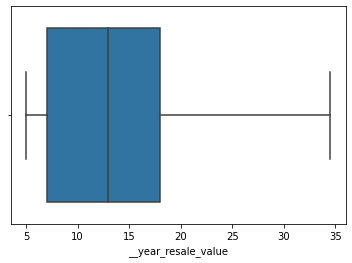

In [45]:
sns.boxplot(df_t1.__year_resale_value)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_in_thousands'>

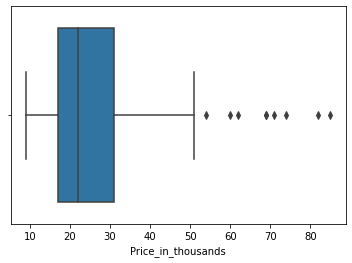

In [46]:
sns.boxplot(df.Price_in_thousands)

In [47]:
Q1 =df['Price_in_thousands'].quantile(0.25)
Q3 = df['Price_in_thousands'].quantile(0.75)

Q1,Q3

(17.0, 31.0)

In [48]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit


(-62.5, 110.5)

In [49]:
outlier = np.where(df['Price_in_thousands']>upper_limit, True,np.where(df['Price_in_thousands']<lower_limit,True,False))
outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [50]:
df_trimmed = df.loc[~(outlier),]
df_trimmed

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16,16,Passenger,21,1,140,101,67,172,2,13,28,2/2/2012,58
1,Acura,TL,39,19,Passenger,28,3,225,108,70,192,3,17,25,6/3/2011,91
2,Acura,CL,14,18,Passenger,12,3,225,106,70,192,3,17,26,1/4/2012,52
3,Acura,RL,8,29,Passenger,42,3,210,114,71,196,3,18,22,3/10/2011,91
4,Audi,A4,20,22,Passenger,23,1,150,102,68,178,2,16,27,10/8/2011,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3,7,Passenger,24,1,160,100,67,176,3,15,25,9/21/2011,66
153,Volvo,S70,15,7,Passenger,27,2,168,104,69,185,3,17,25,11/24/2012,70
154,Volvo,V70,17,7,Passenger,28,2,168,104,69,186,3,17,25,6/25/2011,71
155,Volvo,C70,3,7,Passenger,45,2,236,104,71,185,3,18,23,4/26/2011,101


In [51]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='Price_in_thousands')
df_t2 = winsor.fit_transform(df[['Price_in_thousands']])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_in_thousands'>

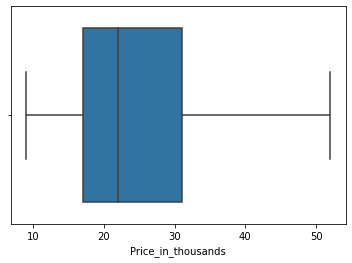

In [52]:
sns.boxplot(df_t2.Price_in_thousands)

In [53]:
df.drop(['Sales_in_thousands','Price_in_thousands','__year_resale_value'], axis=1, inplace=True)

In [54]:
df['Sales_in_thousands'] = df_t2
df['__year_resale_value'] = df_t1
df['Price_in_thousands'] = df_t

In [55]:
df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands,__year_resale_value,Price_in_thousands
0,Acura,Integra,Passenger,1,140,101,67,172,2,13,28,2/2/2012,58,21.0,16.0,16.0
1,Acura,TL,Passenger,3,225,108,70,192,3,17,25,6/3/2011,91,28.0,19.0,39.0
2,Acura,CL,Passenger,3,225,106,70,192,3,17,26,1/4/2012,52,12.0,18.0,14.0
3,Acura,RL,Passenger,3,210,114,71,196,3,18,22,3/10/2011,91,42.0,29.0,8.0
4,Audi,A4,Passenger,1,150,102,68,178,2,16,27,10/8/2011,62,23.0,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1,160,100,67,176,3,15,25,9/21/2011,66,24.0,7.0,3.0
153,Volvo,S70,Passenger,2,168,104,69,185,3,17,25,11/24/2012,70,27.0,7.0,15.0
154,Volvo,V70,Passenger,2,168,104,69,186,3,17,25,6/25/2011,71,28.0,7.0,17.0
155,Volvo,C70,Passenger,2,236,104,71,185,3,18,23,4/26/2011,101,45.0,7.0,3.0


In [81]:
#Independent fearures and Dependent features
x = df.iloc[:,[3,5,6,7,8,9,10,12,13,15]]
y = df.iloc[:,-1]

In [82]:
x

,Engine_size,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Sales_in_thousands,Price_in_thousands
0,1,101,67,172,2,13,28,58,21.0,16.0
1,3,108,70,192,3,17,25,91,28.0,39.0
2,3,106,70,192,3,17,26,52,12.0,14.0
3,3,114,71,196,3,18,22,91,42.0,8.0
4,1,102,68,178,2,16,27,62,23.0,20.0
...,...,...,...,...,...,...,...,...,...,...
152,1,100,67,176,3,15,25,66,24.0,3.0
153,2,104,69,185,3,17,25,70,27.0,15.0
154,2,104,69,186,3,17,25,71,28.0,17.0
155,2,104,71,185,3,18,23,101,45.0,3.0


In [83]:
y

0      16.0
1      39.0
2      14.0
3       8.0
4      20.0
       ... 
152     3.0
153    15.0
154    17.0
155     3.0
156    18.0
Name: Price_in_thousands, Length: 157, dtype: float64

In [84]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [85]:
x_train

,Engine_size,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Sales_in_thousands,Price_in_thousands
140,2,103,66,178,2,15,23,55,11.0,84.0
11,3,109,72,196,3,17,23,95,25.0,39.0
79,1,98,66,173,2,13,30,45,13.0,26.0
68,4,101,69,167,3,20,20,76,21.0,80.0
149,2,98,68,163,2,14,26,47,17.0,5.0
...,...,...,...,...,...,...,...,...,...,...
71,3,110,70,189,3,19,23,94,37.0,12.0
106,3,104,70,178,3,19,18,69,22.0,54.0
14,4,115,74,207,3,18,22,113,39.0,63.0
92,2,105,67,177,3,16,26,78,31.0,18.0


In [86]:
#stndardization of the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

In [87]:
x_train

array([[-0.60404207, -0.65697647, -1.38804383, ..., -0.83390725,
        -1.27397026,  0.86730296],
       [ 0.32329012,  0.2127859 ,  0.38843497, ...,  0.86826298,
         0.0334128 , -0.2061568 ],
       [-1.53137426, -1.38177844, -1.38804383, ..., -1.25944981,
        -1.08720125, -0.51626739],
       ...,
       [ 1.25062231,  1.08254827,  0.98059457, ...,  1.63423959,
         1.34079587,  0.36635507],
       [-0.60404207, -0.36705568, -1.09196403, ...,  0.14484063,
         0.59371983, -0.70710468],
       [-0.60404207, -0.65697647, -0.49980443, ..., -0.49347321,
        -0.43350972,  0.9627216 ]])

In [88]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [89]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [90]:
mse = cross_val_score(regression,x_train, y_train,scoring='neg_mean_squared_error',cv=10)

In [64]:
np.mean(mse)

-5.79178808028157e-28

In [91]:
#prediction
reg_predict = regression.predict(x_test)

In [92]:
reg_predict

array([ 11.1970648 , 144.66997357,  55.2293646 ,  68.07211871,
        23.12247933,  39.63459176,  13.03174396,  11.1970648 ,
        24.95715849,  40.55193134, 143.29396421, 144.66997357,
        24.03981891, 144.66997357,  25.87449807,  38.71725218,
        11.1970648 ,  11.1970648 ,  13.03174396,  31.37853555,
       130.4512101 ,  23.12247933,  35.04789386,  25.87449807,
        39.63459176,  60.73340208,  68.07211871,  21.28780017,
        18.53578144,  20.3704606 ,  55.2293646 ,  57.06404376,
       140.54194547, 144.66997357,  17.61844186,  20.3704606 ,
        48.80798755,  38.71725218,  60.73340208,  18.53578144,
        29.54385639,  40.55193134,  30.46119597,  18.53578144,
        13.94908354,  22.20513975,  48.80798755,  17.61844186])

In [96]:
#evaluating the performance of the model

import sklearn.metrics as metrics

print('MAE: {}'.format(metrics.mean_absolute_error(y_test,reg_predict)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test,reg_predict)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,reg_predict))))

MAE: 7.372742915216471
MSE: 62.05888824325623
RMSE: 7.877746393687488


In [97]:
from sklearn.metrics import r2_score

In [98]:
score = r2_score(reg_predict,y_test)

In [99]:
score

0.964685708624982

In [100]:
#Conclusion
Price of the vehicle is influenced by the factors like Wheel base, length,widt and Engine size
Above model is best fit for the dataset with an accuracy of 96%.